This notebook compares Ridge Regression, the KNN algorithm, Bayesian Regression, the Decision Tree Algorithm, and the SVM Algorithm as egression models for IMDB Movie Data.

## 1. Import Data and Perform Exploratory Data Analysis

In [1]:
# Importing packages

import numpy as np
import pandas as pd
import os
import pandas as pd
from pandas import DataFrame,Series
from sklearn import tree
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
%matplotlib inline

In [2]:
f = pd.read_csv("tmdb_5000_movies.csv")

In [3]:
data=DataFrame(f)
data.head()[:2]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [4]:
# Change all zero numerical values to one
data.replace(0,1,inplace=True)

*Getting non-object elements*


In [5]:
X_data=data.dtypes[data.dtypes!='object'].index
X_train=data[X_data]
X_train.head()[:2]

,budget,id,popularity,revenue,runtime,vote_average,vote_count
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800
1,300000000,285,139.082615,961000000,169.0,6.9,4500


In [6]:
X_train.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492509,8.226064e+07,106.883149,6.105288,690.230897
std,4.072239e+07,88694.614033,31.816512,1.628571e+08,22.577604,1.131456,1234.578678
min,1.000000e+00,5.000000,0.000372,1.000000e+00,1.000000,0.500000,1.000000
25%,7.900000e+05,9014.500000,4.668070,1.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [7]:
# Finding all the columns with NULL values
np.sum(X_train.isnull())

budget          0
id              0
popularity      0
revenue         0
runtime         2
vote_average    0
vote_count      0
dtype: int64

In [8]:
# Filling all Null values
X_train=X_train.fillna(0)
columns=X_train.columns.tolist()
y=X_train['vote_average']
X_train.drop(['vote_average'],axis=1,inplace=True)
X_train.head()[:2]

,budget,id,popularity,revenue,runtime,vote_count
0,237000000,19995,150.437577,2787965087,162.0,11800
1,300000000,285,139.082615,961000000,169.0,4500


<Axes: >

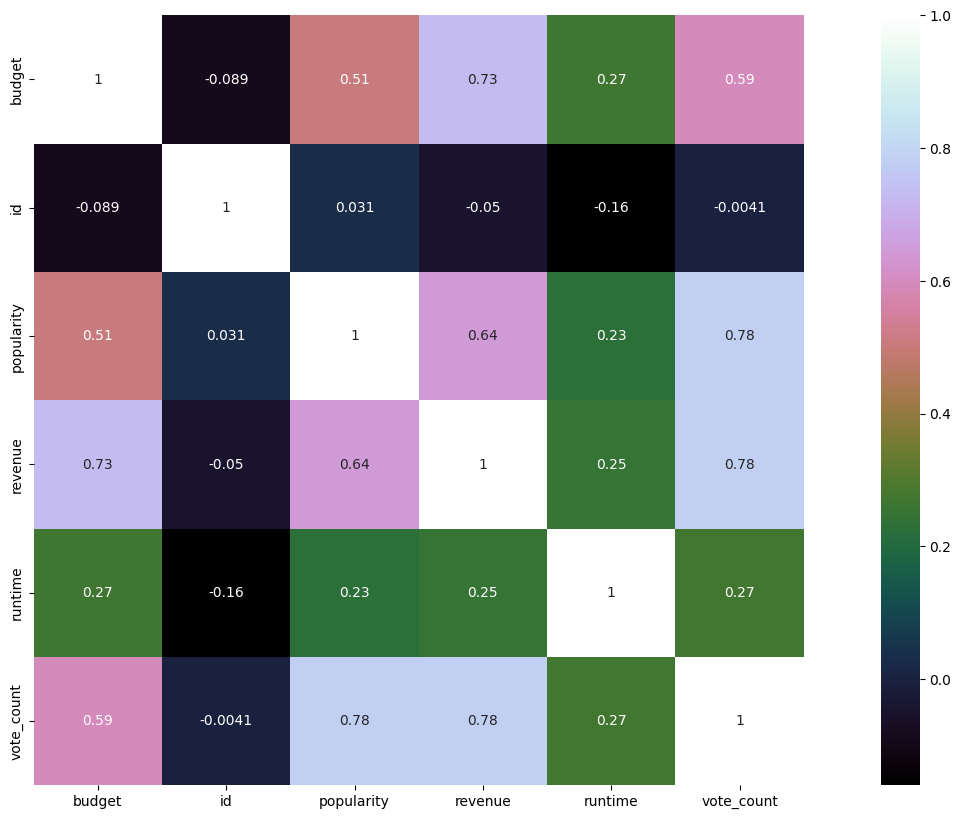

In [9]:
# GETTING Correllation matrix
corr_mat=X_train.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

## 2. Split data into Train/Test

In [10]:
X_Train=X_train.values
X_Train=np.asarray(X_Train)

# Finding normalised array of X_Train
X_std=StandardScaler().fit_transform(X_Train)

<ipython-input-11-6dad6a20e1e5>:4: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,7,1)


Text(0, 0.5, 'Cumulative explained variance')

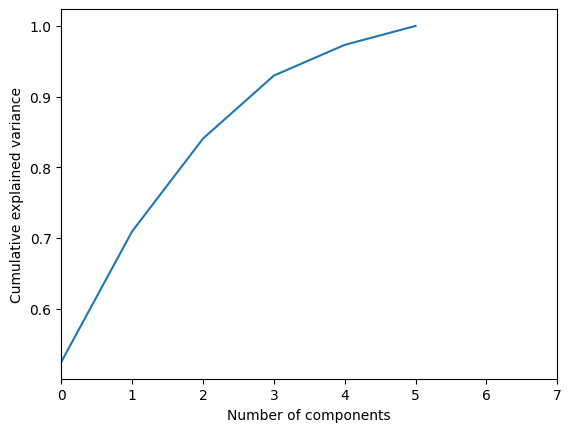

In [11]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**As 5 components can explain more than 95% of the
variance, we choose the number of the components to be 5.**

(-2.0, 2.0)

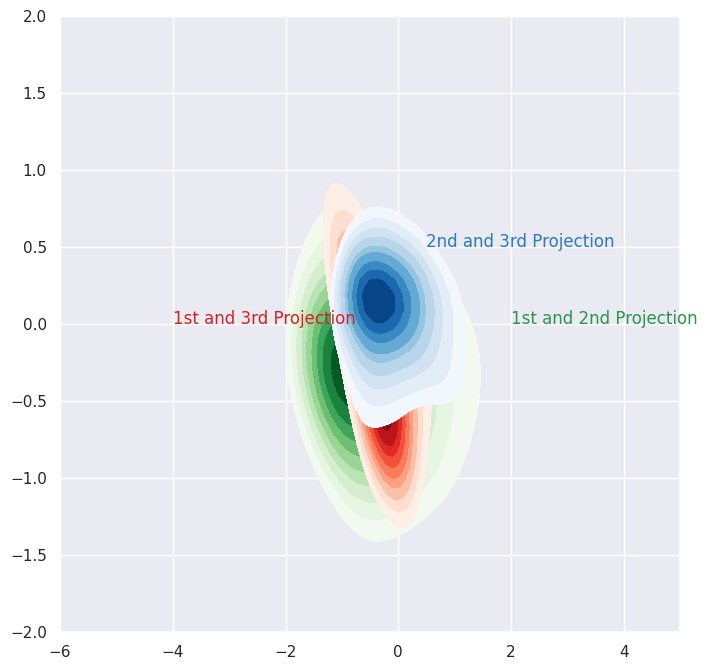

In [12]:
from sklearn.decomposition import PCA
sklearn_pca=PCA(n_components=5)
X_Train=sklearn_pca.fit_transform(X_std)

sns.set(style='darkgrid')
f, ax = plt.subplots(figsize=(8, 8))
# ax.set_aspect('equal')
ax = sns.kdeplot(x=X_Train[:,0], y=X_Train[:,1], cmap="Greens",
          fill=True, thresh=0.35)
ax = sns.kdeplot(x=X_Train[:,1], y=X_Train[:,2], cmap="Reds",
          fill=True, thresh=0.35)
ax = sns.kdeplot(x=X_Train[:,2], y=X_Train[:,3], cmap="Blues",
          fill=True, thresh=0.35)
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
ax.text(0.5, 0.5, "2nd and 3rd Projection", size=12, color=blue)
ax.text(-4, 0.0, "1st and 3rd Projection", size=12, color=red)
ax.text(2, 0, "1st and 2nd Projection", size=12, color=green)
plt.xlim(-6,5)
plt.ylim(-2,2)

In [13]:
number_of_samples = len(y)
np.random.seed(0)
random_indices = np.random.permutation(number_of_samples)
num_training_samples = int(number_of_samples*0.75)
x_train = X_Train[random_indices[:num_training_samples]]
y_train=y[random_indices[:num_training_samples]]
x_test=X_Train[random_indices[num_training_samples:]]
y_test=y[random_indices[num_training_samples:]]
y_Train=list(y_train)


## 3. Test KNN weighting

In [14]:
## Helper function for testing regression with KNNs
from sklearn.model_selection import cross_val_score, train_test_split

def build_test_knn_regressor(X,Y,X_train,Y_train,X_test,Y_test,**kwargs):
    n_neighbors = kwargs.get('n_neighbors',5)
    weights = kwargs.get('weights','uniform')
    cv = kwargs.get('cv',5)
    addl_title_text = "n_neighbors = {}, weights = {}".format(n_neighbors,weights)
    knn = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors,weights=weights)
    knn.fit(X_train, Y_train)

    Y_ = knn.predict(X_train)
    ax = sns.regplot(x=Y_train,y=Y_.flatten(),scatter_kws={"color": "blue", 'alpha':0.3}, line_kws={"color": "green"})
    ax.set(xlabel='Test value', ylabel='Predicted value',
           title='BPM: Training values vs. predicted values; {}'.format(addl_title_text))
    plt.show()
    score_train = cross_val_score(knn, X_train, Y_train, cv=cv)
    print("Training Accuracy: %0.2f (+/- %0.2f)" % (score_train.mean(), score_train.std() * 2))

    Y_ = knn.predict(X_test)
    ax = sns.regplot(x=Y_test,y=Y_.flatten(),scatter_kws={"color": "blue", 'alpha':0.3}, line_kws={"color": "green"})
    ax.set(xlabel='Test value', ylabel='Predicted value',
           title='BPM: Test values vs. predicted values; {}'.format(addl_title_text))
    plt.show()
    score_test = cross_val_score(knn, X_test, Y_test, cv=cv)
    print("Training Accuracy: %0.2f (+/- %0.2f)" % (score_test.mean(), score_test.std() * 2))

    Y_ = knn.predict(X)
    ax = sns.regplot(x=Y,y=Y_.flatten(),scatter_kws={"color": "blue", 'alpha':0.3}, line_kws={"color": "green"})
    ax.set(xlabel='Actual value', ylabel='Predicted value',
           title='BPM: Actual values vs. predicted values; {}'.format(addl_title_text))
    plt.show()
    score = cross_val_score(knn, X, Y, cv=cv)
    print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Testing against uniform weighting:

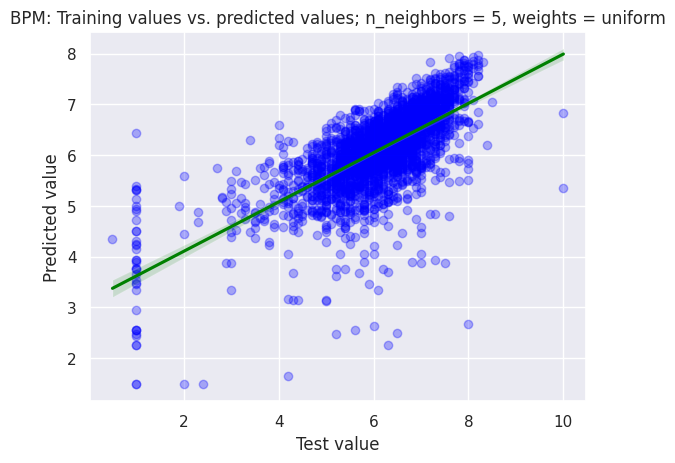

Training Accuracy: 0.21 (+/- 0.26)


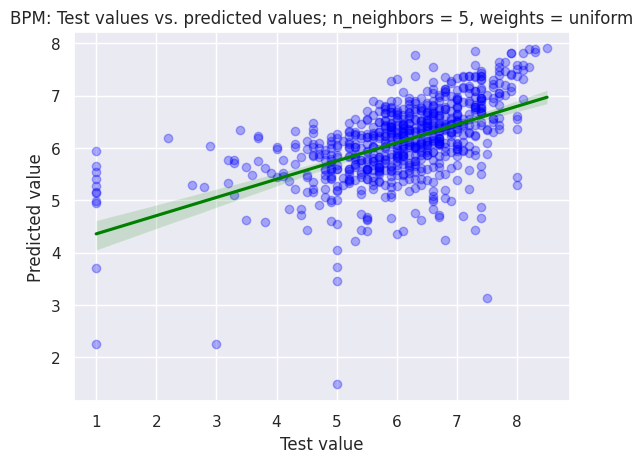

Training Accuracy: 0.33 (+/- 0.03)


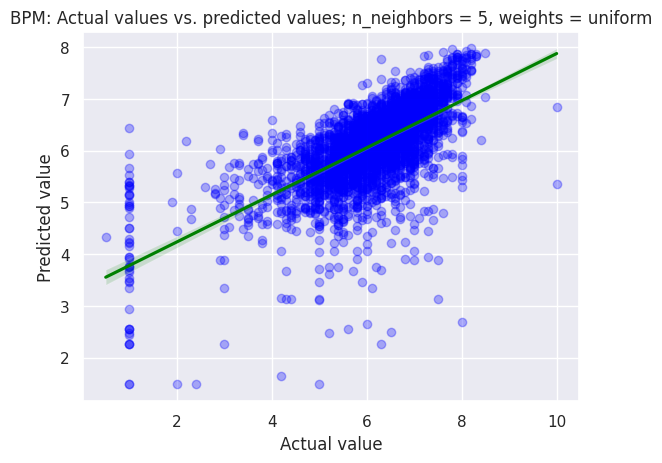

Accuracy: 0.24 (+/- 0.08)


In [15]:
X_train_uw, X_test_uw, Y_train_uw, Y_test_uw = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)
build_test_knn_regressor(x_train,y_train,X_train_uw,Y_train_uw,X_test_uw,Y_test_uw,n_neighbors=5,cv=5)

Testing against weighting by distance:

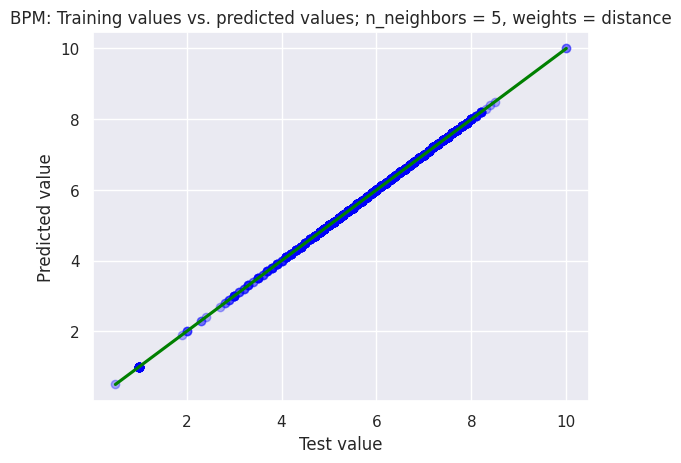

Training Accuracy: 0.19 (+/- 0.25)


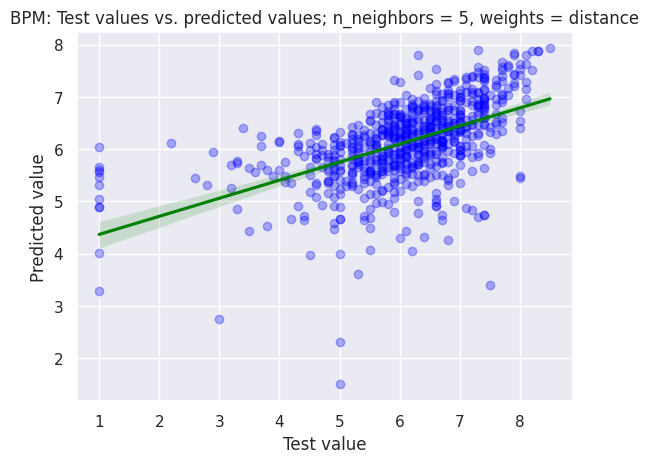

Training Accuracy: 0.34 (+/- 0.08)


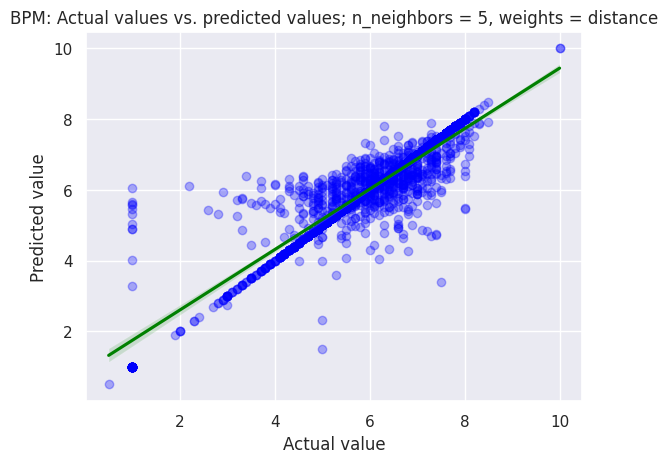

Accuracy: 0.23 (+/- 0.10)


In [16]:
X_train_dw, X_test_dw, Y_train_dw, Y_test_dw = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)
build_test_knn_regressor(x_train,y_train,X_train_dw,Y_train_dw,X_test_dw,Y_test_dw,weights='distance',n_neighbors=5,cv=5)

## 4. Test and compare results through implementing Ridge Regression, the KNN algorithm, Bayesian Regression, the Decision Tree Algorithm, and the SVM Algorithm

**Ridge Regression**

In [17]:
model=linear_model.Ridge()
model.fit(x_train,y_train)
y_predict=model.predict(x_train)

error=0
for i in range(len(y_Train)):
    error+=(abs(y_Train[i]-y_predict[i])/y_Train[i])
train_error_ridge=error/len(y_Train)*100
print("Train error = "'{}'.format(train_error_ridge)+" percent in Ridge Regression")

Y_test=model.predict(x_test)
y_Predict=list(y_test)

error=0
for i in range(len(y_test)):
    error+=(abs(y_Predict[i]-Y_test[i])/y_Predict[i])
test_error_ridge=error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_ridge)+" percent in Ridge Regression")

Train error = 16.287249084874038 percent in Ridge Regression
Test error = 16.820100184978358 percent in Ridge Regression


Text(0.5, 1.0, 'Residual plot in Ridge Regression')

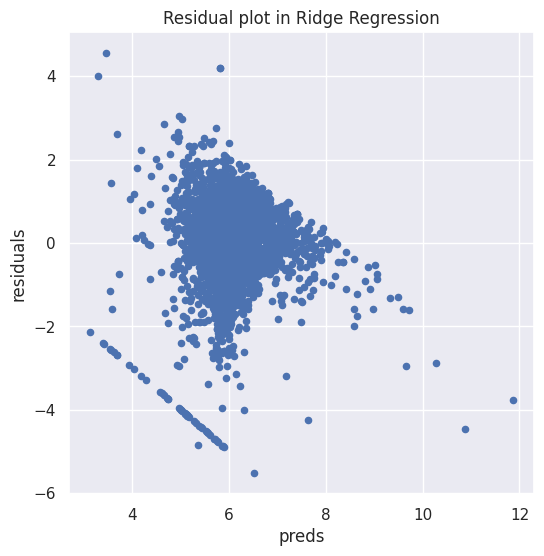

In [18]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Ridge Regression")

**Knn Algorithm**

In [29]:
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(x_train,y_train)
y1_knn=knn.predict(x_train)
y1_knn=list(y1_knn)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_knn[i]-y_Train[i])/y_Train[i])
train_error_knn=error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_knn)+" percent"+" in Knn algorithm")

y2_knn=knn.predict(x_test)
y2_knn=list(y2_knn)
error=0
for i in range(len(y_test)):
    error+=(abs(y2_knn[i]-Y_test[i])/Y_test[i])
test_error_knn=error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_knn)+" percent"+" in knn algorithm")

Train error = 13.16220006047028 percent in Knn algorithm
Test error = 6.5307814604489005 percent in knn algorithm


Text(0.5, 1.0, 'Residual plot in Knn')

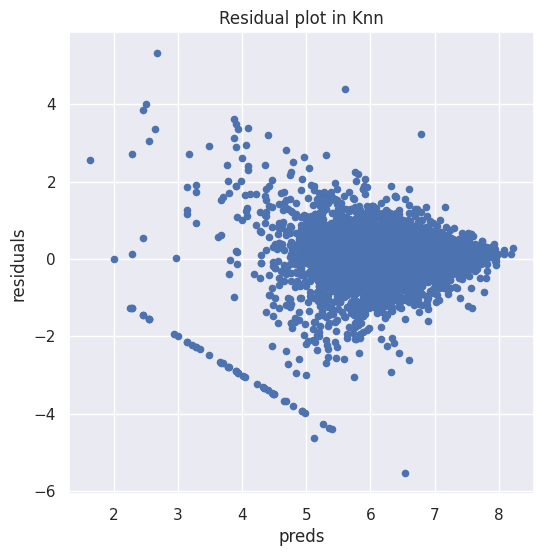

In [30]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":knn.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Knn")

**Bayesian Regression**

In [31]:
reg = linear_model.BayesianRidge()
reg.fit(x_train,y_train)
y1_reg=reg.predict(x_train)
y1_reg=list(y1_reg)
y2_reg=reg.predict(x_test)
y2_reg=list(y2_reg)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_reg[i]-y_Train[i])/y_Train[i])
train_error_bay=error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_bay)+" percent"+" in Bayesian Regression")

error=0
for i in range(len(y_test)):
    error+=(abs(y2_reg[i]-Y_test[i])/Y_test[i])
test_error_bay=(error/len(Y_test))*100
print("Test error = "+'{}'.format(test_error_bay)+" percent"+" in Bayesian Regression")

Train error = 16.29170031251828 percent in Bayesian Regression
Test error = 0.024319051199893 percent in Bayesian Regression


Text(0.5, 1.0, 'Residual plot in Bayesian Regression')

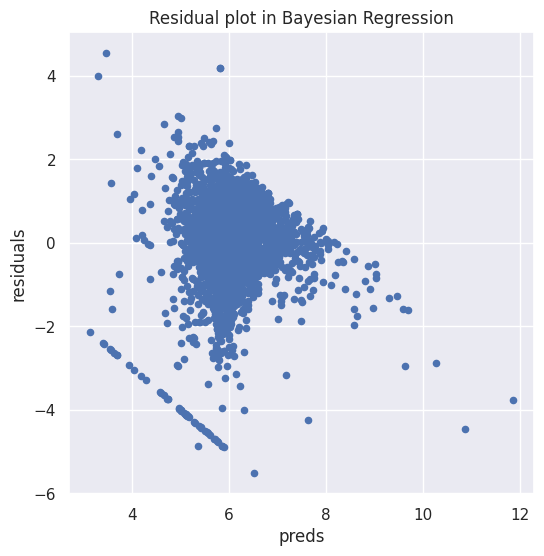

In [32]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":reg.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Bayesian Regression")

**Decision Tree Regressor**

In [33]:
dec = tree.DecisionTreeRegressor(max_depth=1)
dec.fit(x_train,y_train)
y1_dec=dec.predict(x_train)
y1_dec=list(y1_dec)
y2_dec=dec.predict(x_test)
y2_dec=list(y2_dec)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_dec[i]-y_Train[i])/y_Train[i])
train_error_tree=error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_tree)+" percent"+" in Decision Tree Regressor")

error=0
for i in range(len(y_test)):
    error+=(abs(y1_dec[i]-Y_test[i])/Y_test[i])
test_error_tree=error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_tree)+" percent in Decision Tree Regressor")

Train error = 18.26398273197728 percent in Decision Tree Regressor
Test error = 8.516935960648283 percent in Decision Tree Regressor


Text(0.5, 1.0, 'Residual plot in Decision Tree')

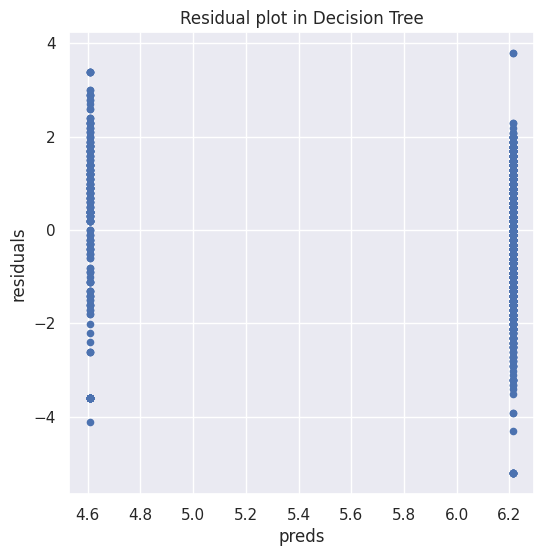

In [34]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":dec.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Decision Tree")

**SVM**

In [35]:
svm_reg=svm.SVR()
svm_reg.fit(x_train,y_train)
y1_svm=svm_reg.predict(x_train)
y1_svm=list(y1_svm)
y2_svm=svm_reg.predict(x_test)
y2_svm=list(y2_svm)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_svm[i]-y_Train[i])/y_Train[i])
train_error_svm=error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_svm)+" percent"+" in SVM Regressor")

error=0
for i in range(len(y_test)):
    error+=(abs(y2_svm[i]-Y_test[i])/Y_test[i])
test_error_svm=error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_svm)+" percent in SVM Regressor")

Train error = 15.045449684953482 percent in SVM Regressor
Test error = 4.048805627643756 percent in SVM Regressor


Text(0.5, 1.0, 'Residual plot in SVM')

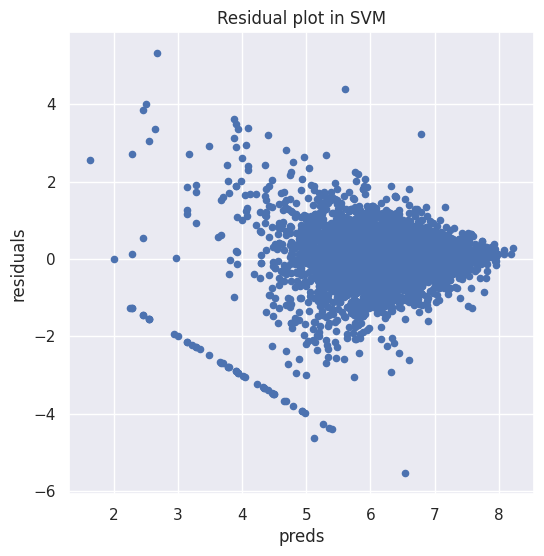

In [36]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":knn.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in SVM")

In [37]:
train_error=[train_error_ridge,train_error_knn,train_error_bay,train_error_tree,train_error_svm]
test_error=[test_error_ridge,test_error_knn,test_error_bay,test_error_tree,test_error_svm]

col={'Train Error':train_error,'Test Error':test_error}
models=['Ridge Regression','Knn','Bayesian Regression','Decision Tree','SVM']
df=DataFrame(data=col,index=models)
df

,Train Error,Test Error
Ridge Regression,16.287249,16.820100
Knn,13.162200,6.530781
Bayesian Regression,16.291700,0.024319
Decision Tree,18.263983,8.516936
SVM,15.045450,4.048806


<Axes: >

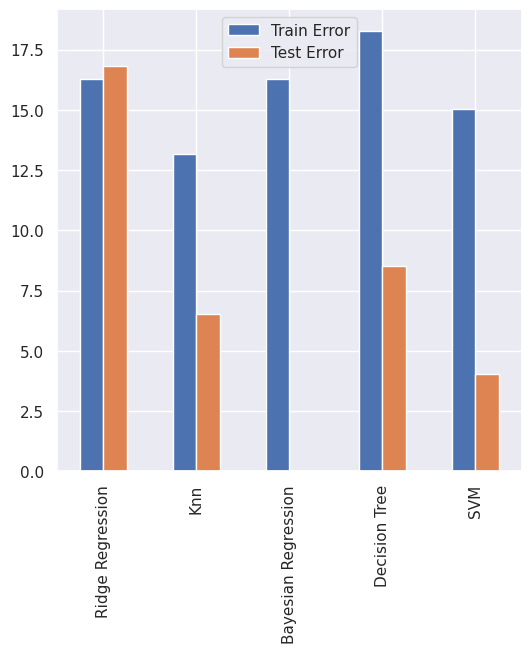

In [38]:
df.plot(kind='bar')

From these results we can see that the KNN and SVM algorithms did fairly well. This is because there are a lot of data points and the features are fairly continuous. As our data is low-dimensional we didn't suffer from the curse of dimensionality.